In [76]:
# prompt: open the food preference file I have upload here and make it as df

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('Food_Preference.csv')
df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [77]:
df = df.drop_duplicates(subset='Participant_ID', keep='first')
df

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [78]:
df_nat = df['Nationality'].value_counts()
df_nat

Nationality
Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Japan            2
MY               2
Maldivian        2
Pakistani        2
Algerian         1
Mauritian        1
China            1
Malaysia         1
Indonesian       1
Indonesain       1
Seychellois      1
Korean           1
Malaysia         1
Nigerian         1
Canadian         1
MALAYSIAN        1
Indonesian       1
Malaysian        1
Maldivian        1
Pakistan         1
Muslim           1
Tanzanian        1
Yemen            1
Name: count, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       288 non-null    object
 1   Participant_ID  288 non-null    object
 2   Gender          284 non-null    object
 3   Nationality     288 non-null    object
 4   Age             288 non-null    int64 
 5   Food            288 non-null    object
 6   Juice           288 non-null    object
 7   Dessert         288 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.1+ KB


In [80]:
df['Nationality_cleaned'] = df['Nationality'].str.strip().str.capitalize()

# Fix specific inconsistencies manually
replace_map = {
    'Malaysia': 'Other',
    'Malaysian': 'Other',
    'My': 'Other',
    'Maldivian': 'Other',
    'Indonesain': 'Other',
    'Indonesia': 'Other',
    'Muslim': 'Other',
    'Pakistani': 'Other',
    'Indonesian': 'Other',
    'Japan': 'Other',
    'Tanzanian': 'Other',
    'Pakistan': 'Other',
    'Canadian': 'Other',
    'Nigerian': 'Other',
    'Algerian': 'Other',
    'Korean': 'Other',
    'Seychellois': 'Other',
    'China': 'Other',
    'Mauritian': 'Other',
    'Yemen': 'Other',
}

df['Nationality_cleaned'] = df['Nationality_cleaned'].replace(replace_map)

# Recount occurrences of each nationality after cleaning
cleaned_nationality_counts = df['Nationality_cleaned'].value_counts()

In [81]:
cleaned_nationality_counts

Nationality_cleaned
Indian    241
Other      47
Name: count, dtype: int64

In [82]:
df.drop(columns=['Nationality', 'Participant_ID'], inplace=True)
df.rename(columns={'Nationality_cleaned': 'Nationality'}, inplace=True)

df

,Timestamp,Gender,Age,Food,Juice,Dessert,Nationality
0,2019/05/07 2:59:13 PM GMT+8,Male,24,Traditional food,Fresh Juice,Maybe,Indian
1,2019/05/07 2:59:45 PM GMT+8,Female,22,Western Food,Carbonated drinks,Yes,Indian
2,2019/05/07 3:00:05 PM GMT+8,Male,31,Western Food,Fresh Juice,Maybe,Indian
3,2019/05/07 3:00:11 PM GMT+8,Female,25,Traditional food,Fresh Juice,Maybe,Indian
4,2019/05/07 3:02:50 PM GMT+8,Male,27,Traditional food,Fresh Juice,Maybe,Indian
...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,Male,27,Western Food,Fresh Juice,Yes,Indian
284,2019/05/10 9:32:54 AM GMT+8,Male,24,Traditional food,Fresh Juice,Yes,Indian
285,2019/05/10 12:09:17 PM GMT+8,Male,25,Traditional food,Fresh Juice,Yes,Indian
286,2019/05/10 12:52:17 PM GMT+8,Male,27,Traditional food,Fresh Juice,Yes,Indian


In [83]:
# Identify indices of missing values in the Gender column
missing_indices = df[df['Gender'].isnull()].index

# Create a list of values to fill: 2 Males and 2 Females
fill_values = ['Male', 'Female', 'Male', 'Female']

# Assign the fill values to the corresponding missing indices
df.loc[missing_indices, 'Gender'] = fill_values

# Verify that there are no more missing values in the Gender column
df['Gender'].isnull().sum()


0

In [84]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract year, month, day, hour, minute, second, and GMT (if applicable)
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second
df['GMT'] = df['Timestamp'].dt.tz  # Will be None if the timezone is not recognized

# Drop the Year, Month, Second, and GMT columns
df = df.drop(columns=['Timestamp','Year', 'Month', 'Second', 'GMT'])

# Display the first few rows to verify
df

C:\Users\RESKY ANDI\AppData\Local\Temp\ipykernel_12408\1614316493.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


,Gender,Age,Food,Juice,Dessert,Nationality,Day,Hour,Minute
0,Male,24,Traditional food,Fresh Juice,Maybe,Indian,7,14,59
1,Female,22,Western Food,Carbonated drinks,Yes,Indian,7,14,59
2,Male,31,Western Food,Fresh Juice,Maybe,Indian,7,15,0
3,Female,25,Traditional food,Fresh Juice,Maybe,Indian,7,15,0
4,Male,27,Traditional food,Fresh Juice,Maybe,Indian,7,15,2
...,...,...,...,...,...,...,...,...,...
283,Male,27,Western Food,Fresh Juice,Yes,Indian,10,9,24
284,Male,24,Traditional food,Fresh Juice,Yes,Indian,10,9,32
285,Male,25,Traditional food,Fresh Juice,Yes,Indian,10,12,9
286,Male,27,Traditional food,Fresh Juice,Yes,Indian,10,12,52


In [85]:
df_copy = df.copy()
df_copy.drop(columns = ['Day','Minute'], inplace = True)
df_copy

,Gender,Age,Food,Juice,Dessert,Nationality,Hour
0,Male,24,Traditional food,Fresh Juice,Maybe,Indian,14
1,Female,22,Western Food,Carbonated drinks,Yes,Indian,14
2,Male,31,Western Food,Fresh Juice,Maybe,Indian,15
3,Female,25,Traditional food,Fresh Juice,Maybe,Indian,15
4,Male,27,Traditional food,Fresh Juice,Maybe,Indian,15
...,...,...,...,...,...,...,...
283,Male,27,Western Food,Fresh Juice,Yes,Indian,9
284,Male,24,Traditional food,Fresh Juice,Yes,Indian,9
285,Male,25,Traditional food,Fresh Juice,Yes,Indian,12
286,Male,27,Traditional food,Fresh Juice,Yes,Indian,12


In [86]:
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df

,Gender,Age,Food,Juice,Dessert,Nationality,Day,Hour,Minute,Age Group
0,Male,24,Traditional food,Fresh Juice,Maybe,Indian,7,14,59,18-25
1,Female,22,Western Food,Carbonated drinks,Yes,Indian,7,14,59,18-25
2,Male,31,Western Food,Fresh Juice,Maybe,Indian,7,15,0,26-35
3,Female,25,Traditional food,Fresh Juice,Maybe,Indian,7,15,0,26-35
4,Male,27,Traditional food,Fresh Juice,Maybe,Indian,7,15,2,26-35
...,...,...,...,...,...,...,...,...,...,...
283,Male,27,Western Food,Fresh Juice,Yes,Indian,10,9,24,26-35
284,Male,24,Traditional food,Fresh Juice,Yes,Indian,10,9,32,18-25
285,Male,25,Traditional food,Fresh Juice,Yes,Indian,10,12,9,26-35
286,Male,27,Traditional food,Fresh Juice,Yes,Indian,10,12,52,26-35


In [87]:
df.drop(columns=['Age'], inplace=True)

Age_counts = df['Age Group'].value_counts()
Age_counts


Age Group
26-35    116
18-25     75
36-45     56
46-60     20
<18       13
60+        8
Name: count, dtype: int64

In [88]:
# Define 6 groups for the 'Hour' column
bins = [0, 4, 8, 12, 16, 20, 24]  # Define bin edges for 6 groups
labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']


# Categorize the 'Hour' column into 6 groups
df['Hour Group'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)


In [89]:
df.drop(columns=['Hour', 'Minute', 'Day'], inplace=True)

In [90]:
HourGroup_counts = df['Hour Group'].value_counts()
HourGroup_counts

Hour Group
Evening          132
Afternoon         83
Late Night        36
Morning           19
Night             17
Early Morning      1
Name: count, dtype: int64

## Visualization

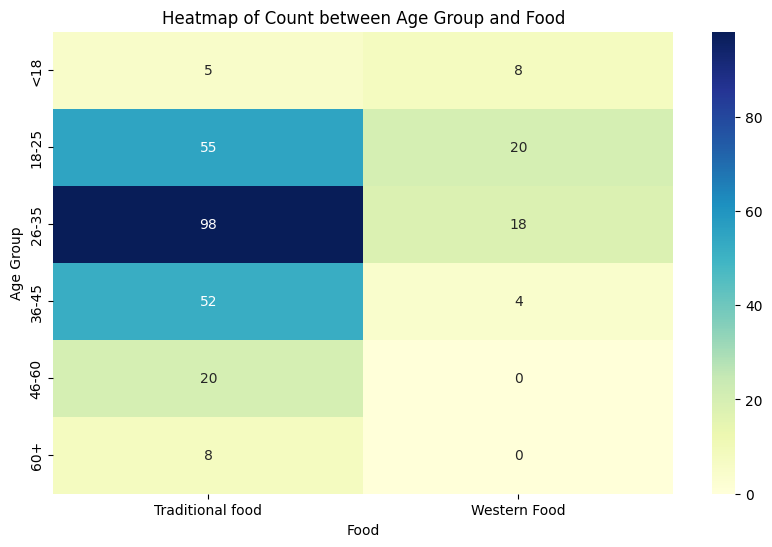

In [91]:
Age_Food_table = pd.crosstab(df['Age Group'], df['Food'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Age_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Age Group and Food")
plt.xlabel("Food")
plt.ylabel("Age Group")
plt.show()

In [92]:
import matplotlib.pyplot as plt

def plot_bar_chart(df, column, title=None, xlabel=None, ylabel=None, color='blue'):
    """
    Creates a bar chart for a specific column in a DataFrame and displays numbers above each bar.
    
    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name to plot.
        title (str, optional): The title of the chart. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        color (str, optional): Color for the bars. Default is 'blue'.
    """
    # Get value counts for the column
    value_counts = df[column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    bars = plt.bar(value_counts.index, value_counts.values, color=color)
    
    # Add numbers above each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bar.get_height(), 
                 str(bar.get_height()), 
                 ha='center', va='bottom', fontsize=10)
    
    
    plt.title(title or f'Bar Chart for {column}')
    plt.xlabel(xlabel or column)
    plt.ylabel(ylabel or 'Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Set the title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)
    

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


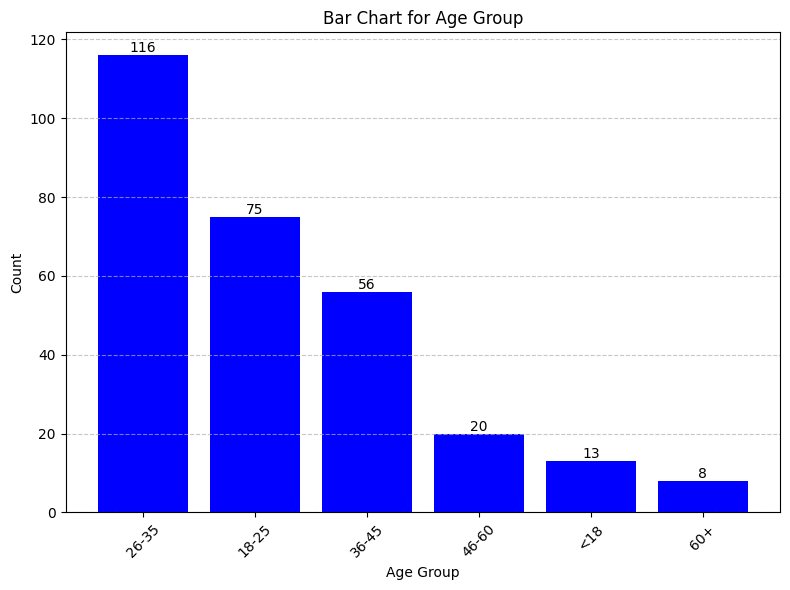

In [93]:
plot_bar_chart(df,'Age Group')

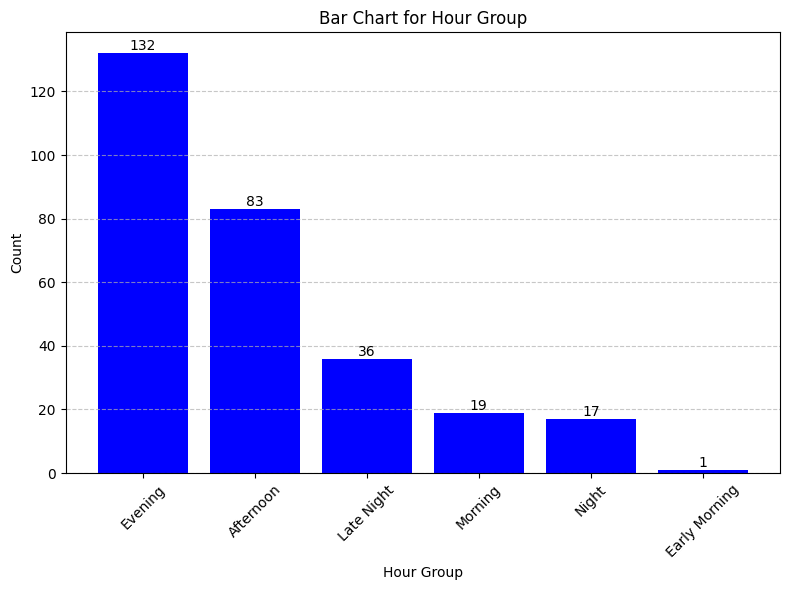

In [94]:
plot_bar_chart(df, 'Hour Group')

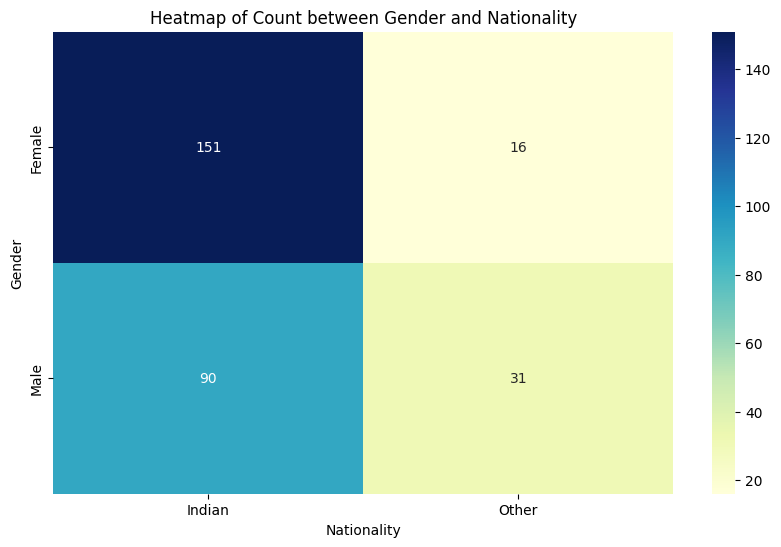

In [95]:
# prompt: create a heatmap to find the number (count) between gender and nationality

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table (cross-tabulation) of 'gender' and 'nationality'
contingency_table = pd.crosstab(df['Gender'], df['Nationality'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Gender and Nationality")
plt.xlabel("Nationality")
plt.ylabel("Gender")
plt.show()

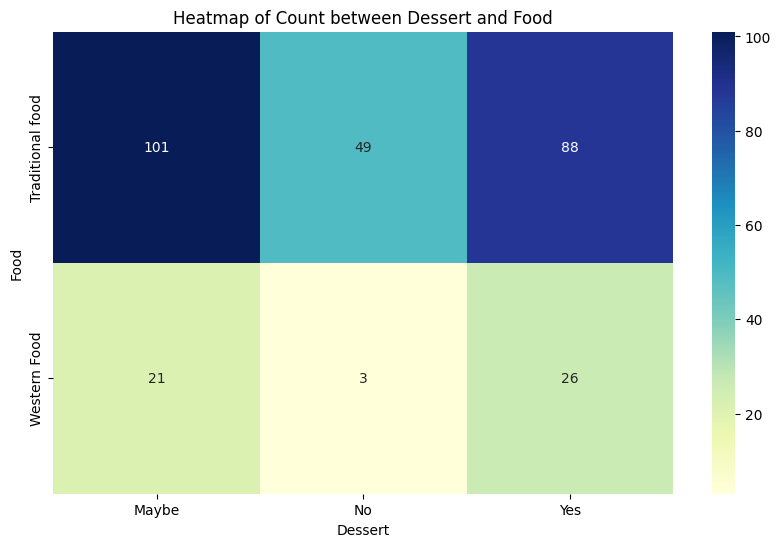

In [96]:
Dessert_Food_table = pd.crosstab(df['Food'], df['Dessert'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Dessert_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Dessert and Food")
plt.xlabel("Dessert")
plt.ylabel("Food")
plt.show()

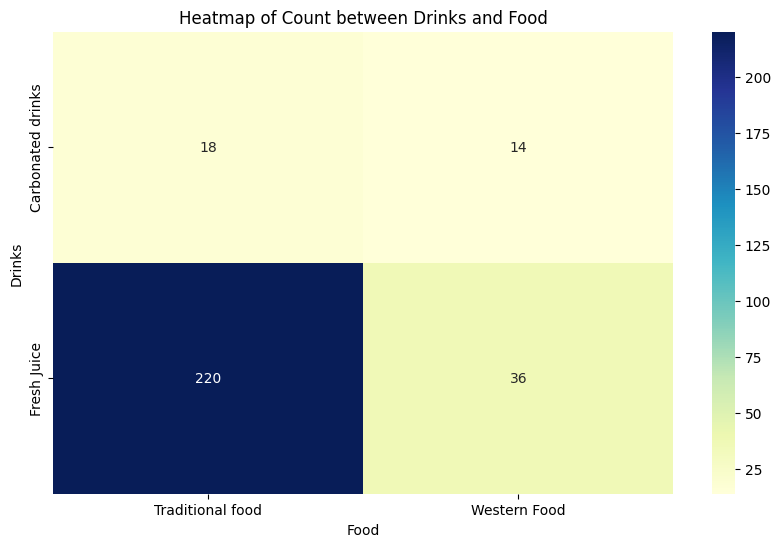

In [97]:
Juice_Food_table = pd.crosstab(df['Juice'], df['Food'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Juice_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Drinks and Food")
plt.xlabel("Food")
plt.ylabel("Drinks")
plt.show()

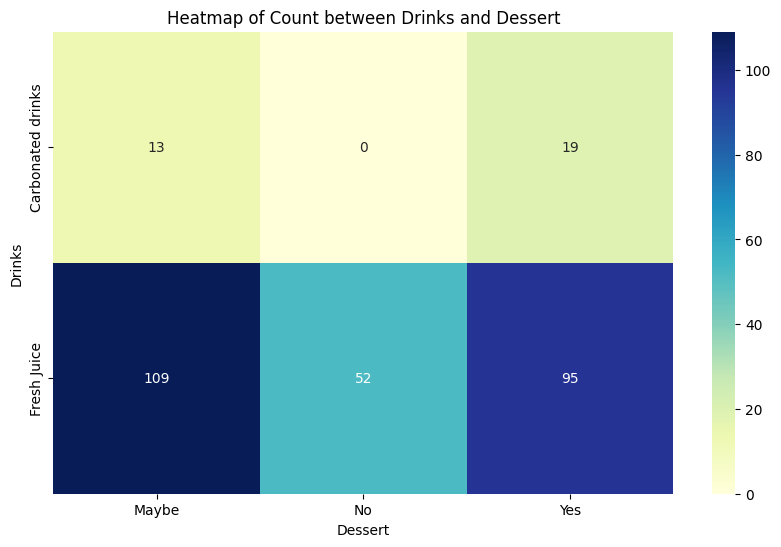

In [98]:
Juice_Dessert_table = pd.crosstab(df['Juice'], df['Dessert'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Juice_Dessert_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Drinks and Dessert")
plt.xlabel("Dessert")
plt.ylabel("Drinks")
plt.show()

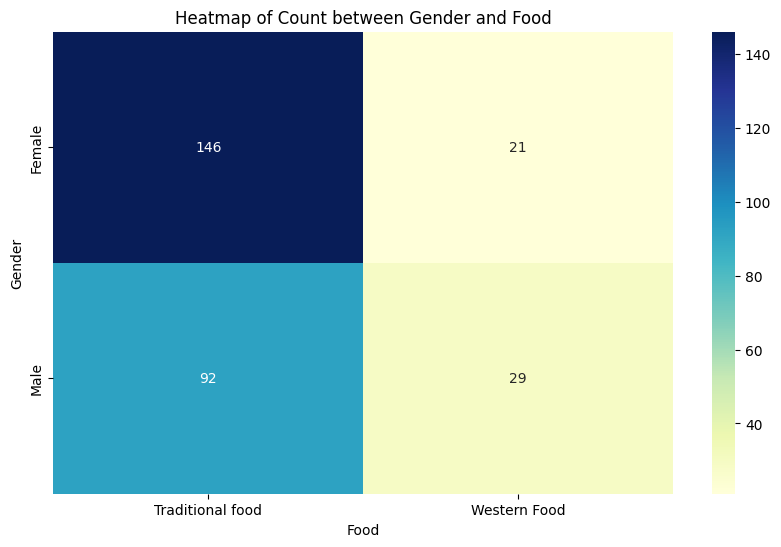

In [99]:
Gender_Food_table = pd.crosstab(df['Gender'], df['Food'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Gender_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Gender and Food")
plt.xlabel("Food")
plt.ylabel("Gender")
plt.show()

In [100]:
df.columns

Index(['Gender', 'Food', 'Juice', 'Dessert', 'Nationality', 'Age Group',
       'Hour Group'],
      dtype='object')

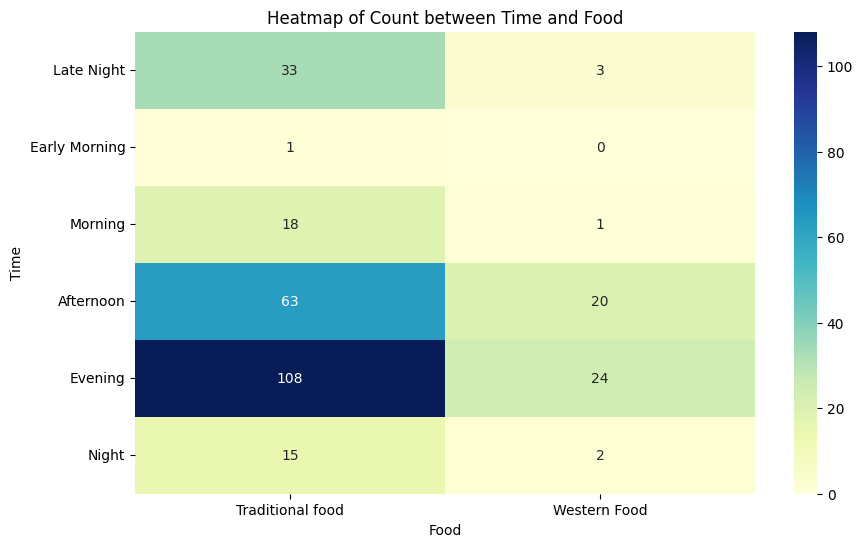

In [101]:
Hour_Food_table = pd.crosstab(df['Hour Group'], df['Food'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Hour_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Time and Food")
plt.xlabel("Food")
plt.ylabel("Time")
plt.show()

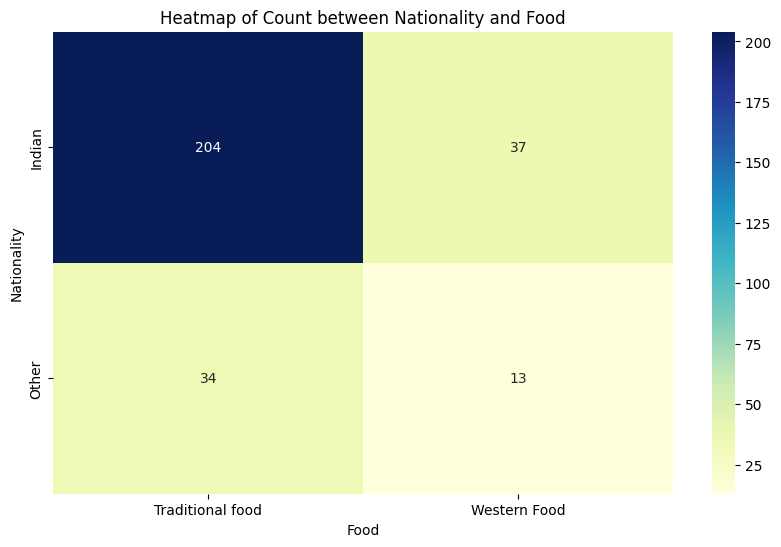

In [102]:
Nationality_Food_table = pd.crosstab(df['Nationality'], df['Food'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Nationality_Food_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Nationality and Food")
plt.xlabel("Food")
plt.ylabel("Nationality")
plt.show()

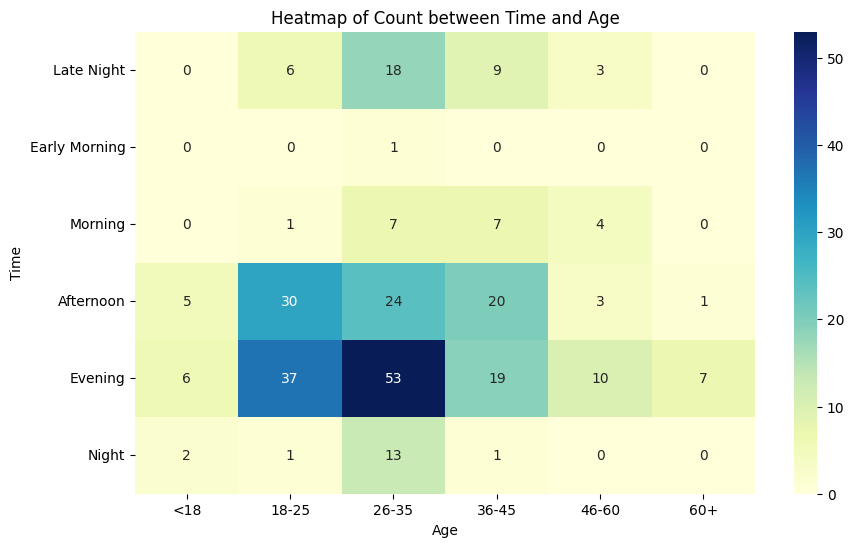

In [103]:
Age_Time_table = pd.crosstab(df['Hour Group'], df['Age Group'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Age_Time_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Time and Age")
plt.xlabel("Age")
plt.ylabel("Time")
plt.show()

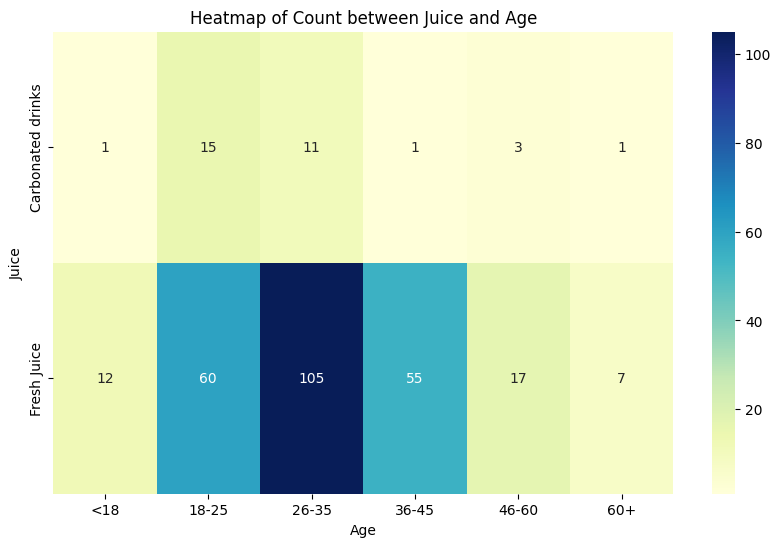

In [104]:
Juice_Age_table = pd.crosstab(df['Juice'], df['Age Group'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Juice_Age_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Count between Juice and Age")
plt.xlabel("Age")
plt.ylabel("Juice")
plt.show()

## Clustering

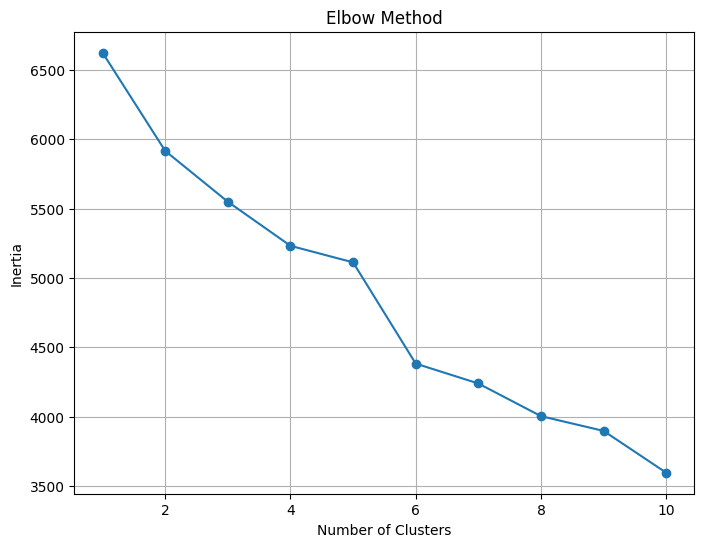

The optimal number of clusters (k) is: 5


In [105]:



# One-hot encode categorical features
categorical_features = ['Gender', 'Food', 'Juice', 'Dessert', 'Nationality', 'Age Group', 'Hour Group']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[categorical_features]).toarray()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_data)

# Apply the elbow method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Calculate the optimal number of clusters using the "elbow"
diff = np.diff(inertia)  # First derivative
diff2 = np.diff(diff)    # Second derivative
optimal_k = k_values[np.argmin(diff2) + 1]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters (k) is: {optimal_k}")


In [111]:
df.to_csv('df_food.csv', index=False)

print("Dataframe saved as 'df_food.csv'")

Dataframe saved as 'df_food.csv'
